# Multiclass Classification Evaluation

This tutorial follows blog: [Tips and Tricks for Multi-Class Classification](https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc) by Mohammed Terry-Jack. 

We compare several classifiers and show how to use **Precision**, **Recall**, **F1**, **Confusion Matrix** to evaluate the model in the multiclass classification problems. For **Precision**, **Recall**, **F1**, we have micro, macro and weight average. We will implement [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) functions from sklearn to evaluate model performance.

The code used in this notebook is from the [notebook](https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/MultiClass.ipynb#scrollTo=64cnM9-UjWmu) given by the same author. There are three classes in the example case.



### Content

0. Data
1. Inherently Multi-class Classifiers
    * 1.a k-nearest neighbor
    * 1.b Random Forest
    * 1.c Neural Network
    * 1.d Deep neural network
    * 1.e Support vector machine
2. One-vs-Rest Binary Classifiers
3. Resampling Dataset
    * 3.a Downsampled
    * 3.b Upsampling
    * 3.c SMOTE


## 0. Data

The data is from [here](https://raw.githubusercontent.com/mohammedterry/ANNs/master/captainamerica.py). It is a 2D array and the number describe the class.

In [2]:
from captainamerica import multiclass_data

In [3]:
white = [255,255,255]
red = [255,0,0]
blue = [0,0,255]

colors = {0: white, 1: red, 2: blue}

x_dim = len(multiclass_data)
y_dim = len(multiclass_data[0])
z_dim = len(red)
n_classes = 3

The `multiclass` reads as 
$$
\textrm{multiclass_data} = \begin{bmatrix} 
x_{11} & x_{12} & \cdots & x_{1m} \\
x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & & & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm} \\
\end{bmatrix}
\quad,
$$
where $x_{ij}$ = 0 (white), 1 (red) or 2 (blue).

In [4]:
labels = set({})
for x in multiclass_data:
    labels = labels.union(set(x))
print (labels)

{0, 1, 2}


(90, 100, 3)


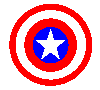

In [5]:
import numpy as np
image_array = np.zeros((x_dim, y_dim, z_dim), np.uint8)

for row in range(len(multiclass_data)):
    for column in range(len(multiclass_data[0])):
        image_array[row][column] = colors[multiclass_data[row][column]]

print (image_array.shape)        
    
from PIL import Image
Image.fromarray(image_array)

The data is a 90 $\times$ 100 array, and each element $x_{ij} = \lbrace 0, 1, 2\rbrace$. Convert to image_array, the data shows the above pattern

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

X = [(col, row) for col in range(x_dim) for row in range(y_dim)]

labels = np.array(multiclass_data).flatten()

print (set(labels))

y = LabelEncoder().fit_transform(labels)
y= OneHotEncoder(sparse=False).fit_transform(y.reshape((len(y), 1)))
y

{0, 1, 2}


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [118]:
set(labels)

{0, 1, 2}

### Unbalanced dataset

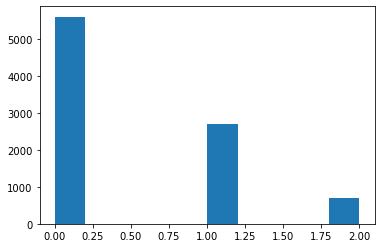

In [7]:
import matplotlib.pyplot as plt

plt.hist(labels)
plt.show()

### 0.b Train-test dataset split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, label_train, label_test = train_test_split(X, y, labels, test_size=0.25, random_state=1000)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(y,y_hat,labels):
    print(classification_report(y, y_hat, labels=labels))
    cm = confusion_matrix(y, y_hat, labels=labels)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmat = pd.DataFrame(cm)
    cmat.columns = labels
#     cmat.set_index([pd.Index(labels, '')], inplace=True)
    sns.heatmap(cmat,cmap="YlGnBu", annot=True)
    plt.title("Confusion Matrix")
    

## 1. Inherently Multi-class Classifiers

### 1.a k-nearest neighbor

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1412
           1       0.95      0.95      0.95       681
           2       0.91      0.94      0.93       157

    accuracy                           0.96      2250
   macro avg       0.95      0.95      0.95      2250
weighted avg       0.96      0.96      0.96      2250



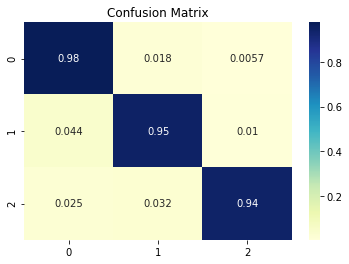

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)
knn_predictions_labels = [np.argmax(p) for p in knn_predictions]
evaluate(label_test, knn_predictions_labels, [0, 1, 2])             

### 1.b Random Forest

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1412
           1       0.94      0.94      0.94       681
           2       0.91      0.93      0.92       157

    accuracy                           0.96      2250
   macro avg       0.94      0.95      0.95      2250
weighted avg       0.96      0.96      0.96      2250



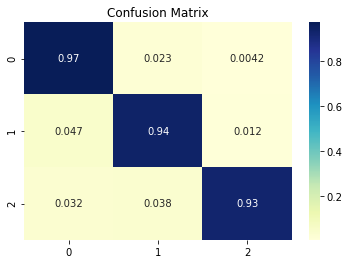

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)
rf_predictions_labels = [np.argmax(p) for p in rf_predictions]
evaluate(label_test, rf_predictions_labels, [0, 1, 2])             

### 1.c Neural Network

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1412
           1       0.63      0.16      0.26       681
           2       0.56      0.59      0.58       157

    accuracy                           0.66      2250
   macro avg       0.62      0.56      0.54      2250
weighted avg       0.65      0.66      0.60      2250



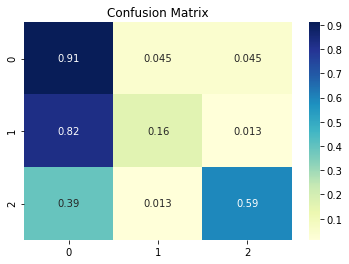

In [37]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train, y_train)

snn_predictions = snn_classifier.predict(X_test)
snn_predictions_labels = [np.argmax(p) for p in snn_predictions]
evaluate(label_test, snn_predictions_labels, [0, 1, 2])

### 1.d Deep neural network

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1412
           1       0.88      0.83      0.85       681
           2       0.83      0.73      0.78       157

    accuracy                           0.88      2250
   macro avg       0.87      0.83      0.85      2250
weighted avg       0.88      0.88      0.88      2250



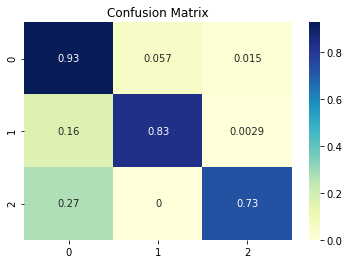

In [38]:
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(X_train, y_train)

dnn_predictions = dnns_classifier.predict(X_test)
dnn_predictions_labels = [np.argmax(p) for p in dnn_predictions]
evaluate(label_test, dnn_predictions_labels, [0, 1, 2])

### 1.e Support vector machine

              precision    recall  f1-score   support

           0       0.82      0.63      0.72      1412
           1       0.53      0.72      0.61       681
           2       0.65      0.98      0.78       157

    accuracy                           0.68      2250
   macro avg       0.67      0.78      0.70      2250
weighted avg       0.72      0.68      0.69      2250



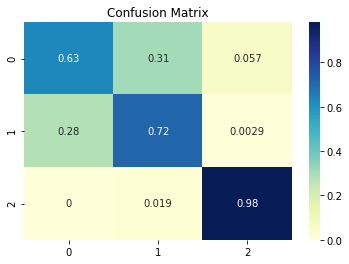

In [39]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(X_train, label_train)

svm_predictions_labels = svm_classifier.predict(X_test)
evaluate(label_test, svm_predictions_labels, [0, 1, 2])

## 2. One-vs-Rest Binary Classifiers


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1412
           1       0.98      0.70      0.81       681
           2       0.77      0.88      0.82       157

    accuracy                           0.89      2250
   macro avg       0.87      0.85      0.85      2250
weighted avg       0.90      0.89      0.88      2250



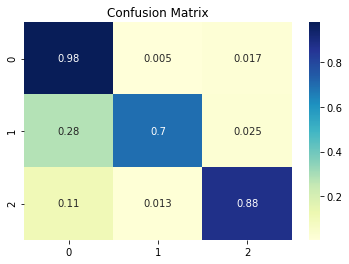

In [40]:
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(X_train, y_train)

dnns_predictions_labels = dnns_classifier.predict(X_test)
dnns_predictions_labels = [np.argmax(p) for p in dnns_predictions_labels]
evaluate(label_test, dnns_predictions_labels, [0, 1, 2])

## 3. Resampling Dataset

### 3.a Downsampled

In [10]:
classes = {}
for i,c in enumerate(labels):
    if c in classes:
        classes[c].append(i)
    else:
        classes[c] = [i]

class_sizes = [len(c) for c in classes.values()]
smallest_class_size = min(class_sizes)

print ("class with smallest size:", smallest_class_size)

class with smallest size: 694


In [41]:
import random

subsampled_X, subsampled_y, subsampled_label = [], [], []
for c in classes:
    ids = random.sample(classes[c], smallest_class_size)
#     print (ids, len(ids))
    subsampled_X += list(np.array(X)[ids])
    subsampled_y += list(np.array(y)[ids])
    subsampled_label += list(np.array(labels)[ids])

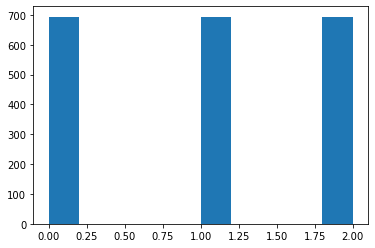

In [172]:
plt.hist(subsampled_label)
plt.show()

In [42]:
subsampled_X_train, subsampled_X_test, subsampled_y_train, subsampled_y_test, _, subsampled_label_test = \
            train_test_split(subsampled_X, subsampled_y, subsampled_label, test_size=0.25, random_state=1000)

              precision    recall  f1-score   support

           0       0.63      0.88      0.74       174
           1       0.87      0.36      0.50       163
           2       0.85      0.98      0.91       184

    accuracy                           0.75       521
   macro avg       0.78      0.74      0.72       521
weighted avg       0.78      0.75      0.72       521



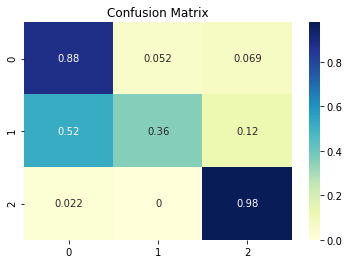

In [43]:
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(subsampled_X_train, subsampled_y_train)

dnns_predictions_labels2 = dnns_classifier.predict(subsampled_X_test)
dnns_predictions_labels2 = [np.argmax(p) for p in dnns_predictions_labels2]
evaluate(subsampled_label_test, dnns_predictions_labels2, [0, 1, 2])

### 3.b Upsampling

In [44]:
import numpy as np

largest_class_size = max(class_sizes)

upsampled_X, upsampled_y, upsampled_label = [], [], []
for c in classes:
    ids = np.random.choice(classes[c], largest_class_size)
    upsampled_X += list(np.array(X)[ids])
    upsampled_y += list(np.array(y)[ids])
    upsampled_label += list(np.array(labels)[ids])

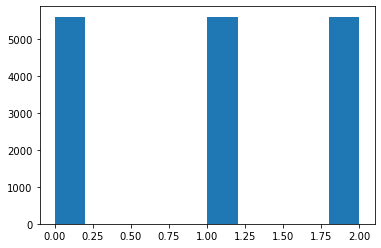

In [23]:
plt.hist(upsampled_label)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1336
           1       0.91      0.85      0.88      1416
           2       0.97      0.92      0.94      1454

    accuracy                           0.91      4206
   macro avg       0.91      0.91      0.91      4206
weighted avg       0.91      0.91      0.91      4206



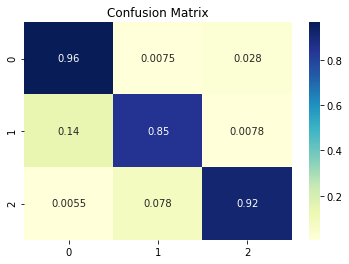

In [45]:
upsampled_X_train, upsampled_X_test, upsampled_y_train, upsampled_y_test, _, upsampled_label_test = \
            train_test_split(upsampled_X, upsampled_y, upsampled_label, test_size=0.25, random_state=1000)

dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(upsampled_X_train, upsampled_y_train)

dnns_predictions_labels3 = dnns_classifier.predict(upsampled_X_test)
dnns_predictions_labels3 = [np.argmax(p) for p in dnns_predictions_labels3]
evaluate(upsampled_label_test, dnns_predictions_labels3, [0, 1, 2])

### 3.c SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_labels = sm.fit_resample(X, labels)

In [186]:
len(resampled_X), len(X), len(resampled_labels)

(16824, 9000, 16824)

In [187]:
resampled_labels[:5]

array([0, 0, 0, 0, 0])

In [26]:
resampled_y = LabelEncoder().fit_transform(resampled_labels)
resampled_y = OneHotEncoder(sparse=False).fit_transform(resampled_y.reshape((len(resampled_y), 1)))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1313
           1       0.93      0.74      0.83      1448
           2       0.96      0.95      0.96      1445

    accuracy                           0.88      4206
   macro avg       0.89      0.88      0.88      4206
weighted avg       0.89      0.88      0.88      4206



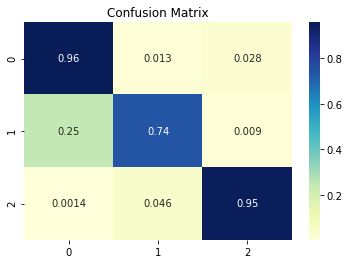

In [46]:
resampled_X_train, resampled_X_test, resampled_y_train, resampled_y_test, _, resampled_label_test = \
            train_test_split(resampled_X, resampled_y, resampled_labels, test_size=0.25, random_state=1000)

dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(resampled_X_train, resampled_y_train)

dnns_predictions_labels4 = dnns_classifier.predict(resampled_X_test)
dnns_predictions_labels4 = [np.argmax(p) for p in dnns_predictions_labels4]
evaluate(resampled_label_test, dnns_predictions_labels4, [0, 1, 2])